src:
- https://www.youtube.com/watch?v=jztwpsIzEGc
- https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

# Dependencies and Setup

In [2]:
import tensorflow as tf

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2025-03-12 18:43:25.247334: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
tf.config.list_physical_devices('GPU')

[]

# Load Data

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
path = "../../Database/images"
data = tf.keras.utils.image_dataset_from_directory(path)
class_names = data.class_names

Found 2939 files belonging to 22 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

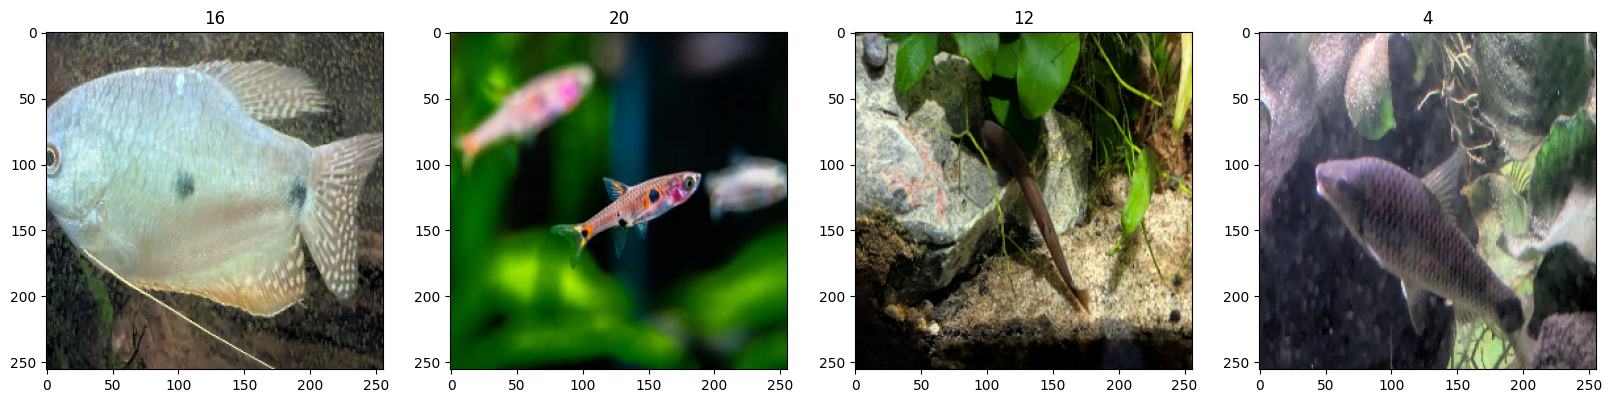

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [10]:
data = data.map(lambda x,y: (x/255, y))

In [11]:
data.as_numpy_iterator().next()

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [4.15517777e-01, 4.97870713e-01, 1.96982235e-01],
          [3.79365802e-01, 4.61718738e-01, 1.52558208e-01],
          [3.61213237e-01, 4.43566173e-01, 1.33762255e-01]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [4.17693019e-01, 5.00045955e-01, 1.99157476e-01],
          [3.81541044e-01, 4.63894010e-01, 1.58727065e-01],
          [3.61272722e-01, 4.43625659e-01, 1.38172224e-01]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [4.21323180e-01, 5.03537893e-01, 2.0480

# Split Data

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train_size

64

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Extract images and labels

In [15]:
train_images = []
train_labels = []

In [16]:
for images, labels in train:
    train_images.append(images.numpy())  # Append image batch
    train_labels.append(labels.numpy())  # Append label batch

2025-03-12 18:43:29.487832: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
# Convert lists to numpy arrays
train_images = np.concatenate(train_images, axis=0)  # Concatenate all batches along the first axis (samples)
train_labels = np.concatenate(train_labels, axis=0)

In [18]:
val_images = []
val_labels = []

In [19]:
for images, labels in val:
    val_images.append(images.numpy())  # Append image batch
    val_labels.append(labels.numpy())  # Append label batch

print("val_labels before concatenation:", val_labels)

val_labels before concatenation: [array([11,  9, 16,  5,  1, 12, 14, 10,  9,  8, 10,  1, 18,  4, 11, 12,  5,
       20,  9,  5, 16, 18, 15, 20, 19, 16,  7, 14, 11,  4, 21, 16],
      dtype=int32), array([14,  6,  7, 15,  4, 10, 11, 20, 16, 15, 16, 14,  9, 11,  3, 12, 15,
       11, 16, 13, 10,  3,  8,  6, 16, 11, 15,  9,  8, 13,  7, 13],
      dtype=int32), array([18,  3, 15,  6,  1, 16, 17, 15, 16, 15, 14,  6,  4,  6, 15,  6,  4,
       13, 13, 11,  7,  6, 20, 15, 10, 13,  9, 12,  4,  1,  3,  6],
      dtype=int32), array([10, 11, 13, 13,  5, 18,  9,  0,  4,  4,  2, 15,  2, 18,  7, 20, 21,
       15, 16, 17,  6, 14,  7, 20, 11,  4, 20,  6, 19, 10, 16, 15],
      dtype=int32), array([ 9, 11,  9, 16,  9, 10, 11,  2, 20, 12, 16, 16,  4,  8, 20, 16, 21,
       12,  9, 16, 10,  9,  6, 16, 19,  5, 11, 14, 16, 13, 17, 18],
      dtype=int32), array([11, 13,  2, 19, 18, 14,  5, 18,  7,  5,  9, 18, 11, 20, 17,  2, 18,
        5,  5, 16,  1, 13,  1, 13,  7, 11, 21,  5, 19,  7,  7,  2],
      dt

2025-03-12 18:43:32.838286: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:
# Convert lists to numpy arrays
val_images = np.concatenate(val_images, axis=0)  # Concatenate all batches along the first axis (samples)
val_labels = np.concatenate(val_labels, axis=0)

# Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
# First convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Second convolutional layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Third convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))

# Output layer for 22 classes
model.add(Dense(22, activation='softmax'))

/run/media/mad/SATA_SSD/Projekte/Git/Varanasi3DErfassung/AquariumFishRecognition/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
# One-hot encode the labels
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=22)
val_labels_one_hot = to_categorical(val_labels, num_classes=22)

# Check shapes of the data
print("train_images shape:", train_images.shape)  # (num_train_samples, height, width, channels)
print("train_labels_one_hot shape:", train_labels_one_hot.shape)  # (num_train_samples, 22)
print("val_images shape:", val_images.shape)  # (num_val_samples, height, width, channels)
print("val_labels_one_hot shape:", val_labels_one_hot.shape)  # (num_val_samples, 22)

train_images shape: (2048, 256, 256, 3)
train_labels_one_hot shape: (2048, 22)
val_images shape: (576, 256, 256, 3)
val_labels_one_hot shape: (576, 22)


In [27]:
# Compile the model with categorical crossentropy
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,702,022 (14.12 MB)

 Trainable params: 3,702,022 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train_images, train_labels_one_hot, epochs=20,
                 validation_data=(val_images, val_labels_one_hot),
                 callbacks=[tensorboard_callback])


Epoch 1/20


2025-03-12 18:43:33.899852: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1610612736 exceeds 10% of free system memory.


64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 395ms/step - accuracy: 0.0871 - loss: 3.0200 - val_accuracy: 0.2257 - val_loss: 2.6263
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 392ms/step - accuracy: 0.2707 - loss: 2.4405 - val_accuracy: 0.3837 - val_loss: 2.1972
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 384ms/step - accuracy: 0.4791 - loss: 1.7598 - val_accuracy: 0.4635 - val_loss: 2.0042
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 386ms/step - accuracy: 0.7313 - loss: 0.9186 - val_accuracy: 0.5469 - val_loss: 1.8341
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 388ms/step - accuracy: 0.9046 - loss: 0.3692 - val_accuracy: 0.5451 - val_loss: 2.2609
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 390ms/step - accuracy: 0.9421 - loss: 0.2190 - val_accuracy: 0.5816 - val_loss: 2.6663
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 389ms/step - accuracy: 0.9675 - loss: 0.1393 - val_accuracy: 0.5677 - val_loss: 2.6544
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 393ms/step - accuracy: 0.9945 - loss: 0.0443 - val_accuracy: 0.566

# Plot Performance

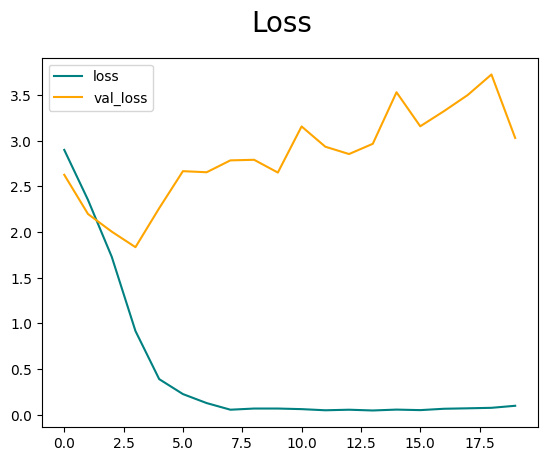

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

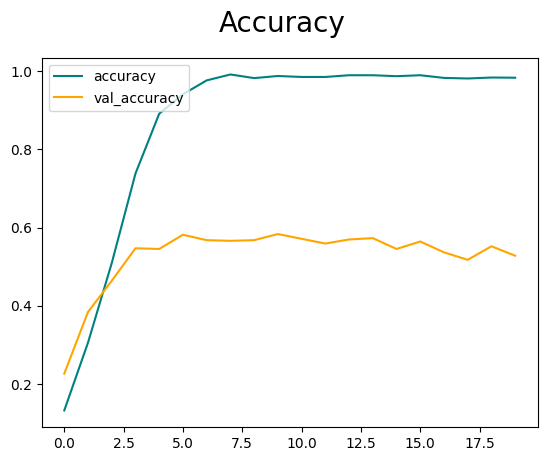

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [36]:
# Iterate over test dataset
for batch in test.as_numpy_iterator():
    X, y = batch

    # Ensure `y` is one-hot encoded
    y_one_hot = to_categorical(y, num_classes=22)  # Convert labels to one-hot

    # Get model predictions
    yhat = model.predict(X)

    # Update metrics
    pre.update_state(y_one_hot, yhat)  # Use one-hot encoded labels
    re.update_state(y_one_hot, yhat)   # Use one-hot encoded labels
    acc.update_state(y_one_hot, yhat)  # Use one-hot encoded labels

# Print final metric values
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Precision: 0.502439022064209
Recall: 0.3576388955116272
Accuracy: 0.4131944477558136


# Test

In [37]:
import cv2

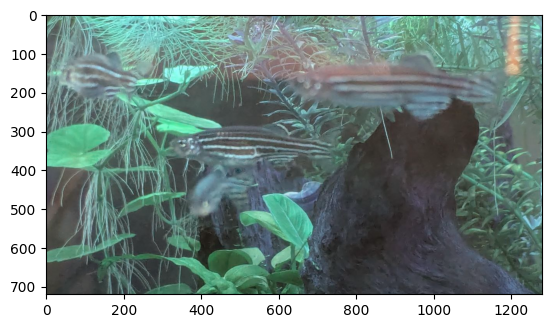

In [38]:
img = cv2.imread('test_pictures/Brachydanio.jpeg')
plt.imshow(img)
plt.show()

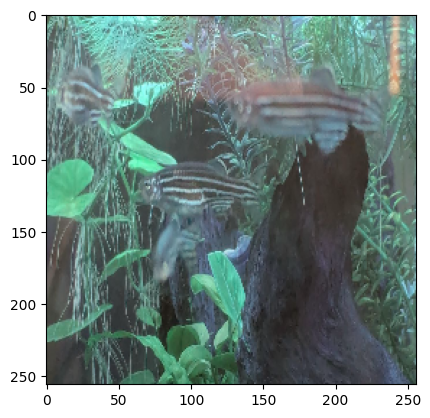

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [41]:
yhat

array([[2.0486773e-03, 7.5425794e-03, 2.3218786e-02, 1.8907277e-03,
        1.0346192e-02, 2.4741656e-01, 1.9663446e-01, 3.3790320e-01,
        5.2305654e-04, 2.0405469e-02, 1.1685144e-02, 1.2000833e-03,
        1.3507851e-02, 4.2509153e-02, 3.0035750e-04, 3.6145651e-04,
        8.6359456e-03, 3.3138424e-02, 8.2639838e-03, 1.7071889e-03,
        8.9142524e-04, 2.9869219e-02]], dtype=float32)

In [42]:
# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is: {class_names[predicted_class]}')

Predicted class is: Hyphessobrycon_amandae


# Save the Model